In [5]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline
from sympy import *

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [72]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [74]:
a = []

for user in raitings:
    m = []
    for user1 in raitings:
        s = round(np.dot(user, user1)/(np.linalg.norm(user) * np.linalg.norm(user1)),5)
        if s == 1:
            m.append(0)
        else:
            m.append(s)
    a.append([list(user), list(raitings[m.index(max(m))])])
a

[[[4, 4, 9, 4, 1, 6, 10, 7, 9, 6, 9, 2, 8, 6, 6],
  [2, 7, 7, 6, 10, 6, 8, 9, 8, 6, 10, 1, 7, 10, 4]],
 [[9, 2, 5, 10, 7, 8, 10, 5, 6, 2, 1, 6, 8, 9, 7],
  [3, 7, 3, 5, 7, 9, 9, 6, 2, 9, 1, 2, 8, 10, 6]],
 [[1, 6, 8, 8, 4, 9, 3, 8, 10, 5, 2, 6, 8, 1, 6],
  [5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]],
 [[6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7],
  [5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]],
 [[3, 7, 3, 5, 7, 9, 9, 6, 2, 9, 1, 2, 8, 10, 6],
  [2, 7, 7, 6, 10, 6, 8, 9, 8, 6, 10, 1, 7, 10, 4]],
 [[8, 3, 7, 3, 8, 6, 1, 8, 8, 6, 1, 9, 4, 10, 1],
  [5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]],
 [[9, 8, 4, 8, 8, 10, 6, 1, 1, 2, 9, 5, 2, 7, 2],
  [6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7]],
 [[4, 1, 6, 4, 3, 10, 4, 4, 2, 8, 7, 9, 3, 8, 3],
  [8, 3, 7, 3, 8, 6, 1, 8, 8, 6, 1, 9, 4, 10, 1]],
 [[2, 7, 7, 6, 10, 6, 8, 9, 8, 6, 10, 1, 7, 10, 4],
  [4, 4, 9, 4, 1, 6, 10, 7, 9, 6, 9, 2, 8, 6, 6]],
 [[5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10],
  [1, 6, 8, 8, 4, 9, 3, 8, 1

In [83]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pca = PCA(n_components = 5)
raiting_reduced = pca.fit_transform(raitings)
raiting_recovered = pca.inverse_transform(raiting_reduced)
mse = mean_squared_error(raitings, raiting_recovered)
print(mse)

1.2455442696728187


<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [57]:
 from sympy import *
import numpy as np
x = Symbol('x')
y = (tan(sin(x) + cos(2*x + 3))**2)
yprime = y.diff(x)
yprime


f = lambdify(x, yprime, 'numpy')
f(np.ones(1))


array([55.38591764])

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [59]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [60]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [61]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

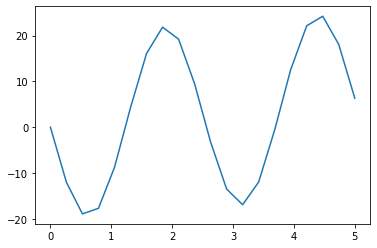

In [62]:
plt.plot(x, fx)
plt.show()

In [63]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [64]:
res = minimize(error,  (-1,0),  method='COBYLA')

In [65]:
A = res.x[0]
B = res.x[1]
print('a = ', round(A, 1),'; b = ', round(B,1))

a =  3.0 ; b =  -2.5


### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [67]:
import random
import pandas as pd

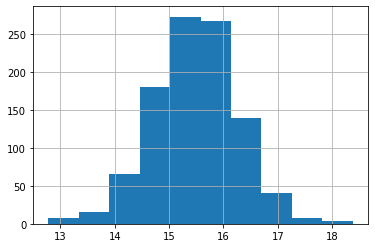

In [70]:
a = []
for _ in range (1000):
    b = []
    for _ in range(50):
        b.append(random.randint(10, 29))
    a.append(np.mean(b))
#print(RES)
df = pd.DataFrame({'mean': RES})
df['mean'].hist()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [42]:
from sympy import *
A = Matrix([[1, 4], [1, 1]])
m = A.eigenvals() 
n = A.eigenvects()
A

Matrix([
[1, 4],
[1, 1]])

In [40]:
m

{3: 1, -1: 1}

In [41]:
n

[(-1,
  1,
  [Matrix([
   [-2],
   [ 1]])]),
 (3,
  1,
  [Matrix([
   [2],
   [1]])])]